In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from scRNA.simulation import generate_toy_data, split_source_target

In [16]:
n_genes = 100
n_trg = 100
n_src = 100
cluster_spec = [1, [2, 3]]

In [23]:
data, labels = generate_toy_data(num_genes=n_genes, 
                                 num_cells=n_trg + n_src, 
                                 cluster_spec=cluster_spec)
print data.shape

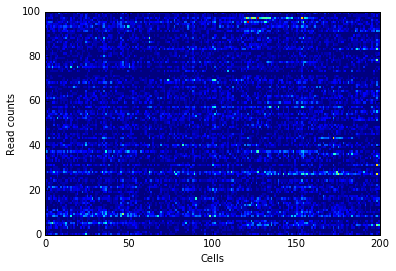

In [27]:
inds = np.argsort(labels)
plt.pcolor(data[:, inds])
plt.xlabel('Cells')
plt.ylabel('Read counts')